# Characteristics of Successful Studios: Insights for Microsoft

Steven Dye and Allison Lee

Module 1 Project: Narrative Summary

### Table of Contents###

1.  <a href='TheProblemStatement'>The Problem Statement </a>
2.  <a href='methodology'>Methodology and Approach</a>
3.  <a href='sources'>Data Sources</a>
4.  <a href='findings'>Key Findings</a>
5.  <a href='conclusions'>Conclusions and Recommendations</a>
6. <a href='next'>Next Steps</a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
final_df = pd.read_csv('./data/final_df.csv')

<a id='TheProblemStatement'></a>
## The Problem Statement###

**Which types of studios are associated with successful films?**

**What kind of movie studio model should microsoft base theirs off of?**

Our main aim for this analysis was to inform Microsoft's approach to the movie industry. As a first step, we sought to understand which types of studios were associated with successful films. We also explored the production budgets and worldwide gross revenue associated with these films and created several variables.  

<a id ='methdology'></a>
## Methodology and Approach

We define "successful" studios using the metric of return on investment (ROI). We calculate ROI as gross sales less production budget. ROI is a well-established KPI that shows the return per dollar invested. We selected ROI because it is a monetary measure--which captures the profit-seeking motive behind Microsoft's entry into the movie industry--and also because ROI accounts for the effects of inflation.

Our unit of analysis is studio size. We selected, cleaned and merged datasets which had three variables of interest: film production budgets, film worldwide gross revenue, and studio name. We created three new variables: ROI, net revenue, and studio_size--which we categorized into three groups based on total production budget for films produced over the 2010 to 2018 period.

The key questions we asked in our analysis were:
 - How did differently sized movie studios perform over the time period? 
 - Which budget sizes are associated with the highest ROI?
 - How many movies should microsoft aim to make a year? 

<a id='sources'></a>
## Data Sources

Our **first** data source is TheNumbers.com. The dataset contains information on release dates, domestic and worldwide gross income, and production budgets. This dataset has information on nearly 6,000 movies spanning a time period from 1915 to not-yet-released films scheduled for 2020.
Source: https://www.the-numbers.com/movie/budgets/all

Our **second** data source is Box Office Mojo. The dataset contains information on year of release, domestic and foreign sales, and studios. This dataset contains information on over 3,000 movies released from 2010 through 2018.
Source: https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2010&p=.htm

We used the information in the first dataset to calculate two metrics: ROI and net revenue. We used information on studios from the second dataset. We then calculated 'studio_size' based on total film production budgets for studios in the dataset. 


We made an **assumption** that domestic gross is included in the worldwide gross figures. 

**We categorized studio sizes as follows:**
 - "Large" studios have total production budgets in the hundreds of millions and up. 
 - "Medium" studios have total production budgets in tens of millions.
 - "Small" studios have total production budgets in the millions and less. 

**We categorized 'movie_budget_size' as follows:**
* "Blockbuster" or large budget films had budgets in the tens of millions and higher
* "Medium" budget films had budgets in the hundreds of thousands and millions
* "Cheap" or low budget films had budgets in in the tens of thousands and less

## Key Findings

We explored several questions to better understand which types of studios are associated with successful films.

**How did differently sized movie studios perform over the time period?**

Large studios have the largest distribution of film ROIs. From Table 1, we also see large studios have produced 89% of the films in our dataset. Figure 1 shows that the distributions of film ROI values for all categories of studios is positively skewed, with large outliers in particular for large studios. Large studios have the highest median ROI at 2.62, followed by medium studios at 1 and small studios at 0.79. 

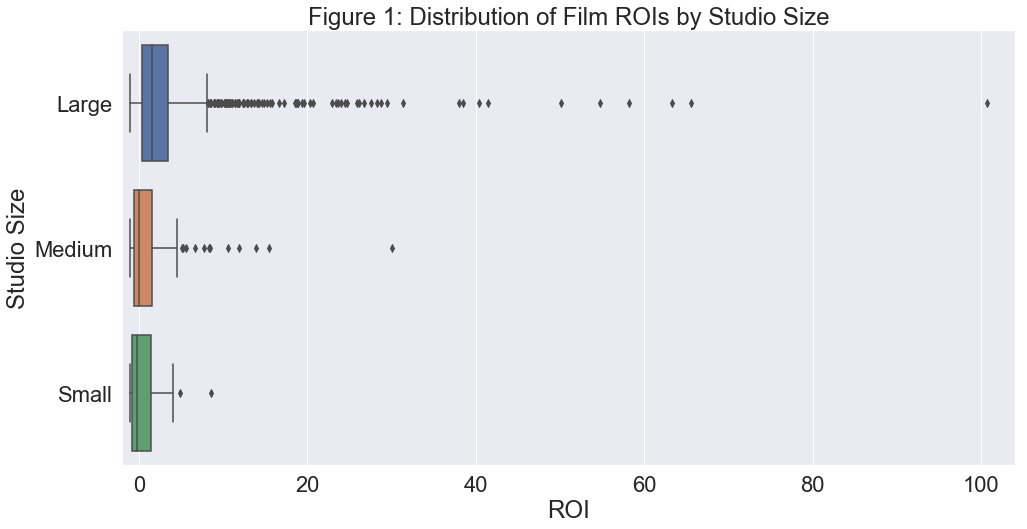

In [11]:
sns.set(font_scale=2)
plt.figure(figsize=(16, 8))
sns.boxplot(y=final_df['studio_size'], x=final_df['roi'])
plt.xlim(-2, 104)
plt.xlabel('ROI')
plt.ylabel('Studio Size')
plt.title('Figure 1: Distribution of Film ROIs by Studio Size');

*Note: Not in image: “The Gallows” (2015) created by Warner Bros. Studio (Large Studio Size), which has an ROI of 416 and ‘The Devil Inside” (2012) created by Paramount Pictures (Large Studio Size) which has an ROI of 102.*

**Table 1: Film ROI Statistics By Studio Size**

In [5]:
np.round(final_df.groupby('studio_size')['roi'].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
studio_size,,,,,,,,
Large,1085.0,3.67,14.24,-1.00,0.39,1.62,3.51,415.56
Medium,97.0,1.56,4.37,-0.99,-0.57,-0.00,1.62,30.02
Small,32.0,0.61,2.09,-0.99,-0.76,-0.21,1.46,8.54


Tables 2 and 3 demonstrate the importance of choosing an appropriate metric by which to measure successful films. Table 2 shows the studios with the top highest average ROI for their films in our dataset. It is notable that there are a mix of studio sizes. Table 3 on the other hand, shows the top ranking studios if we were to measure "success" in terms of gross revenue. As expected, large studios dominate this list. 

**Table 2: Average ROI(%) for Films Released over 2010-2018, by Studio**

In [6]:
final_df.pivot_table(values = 'roi', index = ['studio', 'studio_size']).sort_values(by = 'roi', ascending = False)[0:10]

,,roi
studio,studio_size,
WB (NL),Large,16.495934
FD,Large,11.568032
UTV,Medium,11.171985
Orch.,Small,8.538213
GrtIndia,Medium,7.783430
BH Tilt,Medium,6.896510
Uni.,Large,5.886268
Par.,Large,5.856471
TriS,Large,4.917258


**Table 3: Studios with Highest Total Gross Revenue (in USD millions)**

In [7]:
final_df.pivot_table(values = ['worldwide_gross'], index = ['studio', 'studio_size']).sort_values(by = 'worldwide_gross', ascending = False)[0:10]

,,worldwide_gross
studio,studio_size,
P/DW,Large,5.078028e+08
BV,Large,4.623058e+08
GrtIndia,Medium,2.635029e+08
Fox,Large,2.427769e+08
Sony,Large,2.398766e+08
Uni.,Large,2.367046e+08
WB (NL),Large,2.308342e+08
WB,Large,2.197075e+08
Par.,Large,1.996018e+08


**Which budget sizes are associated with the highest ROI?**

As illustrated in Figure 2, large studios also produce films with a much wider budget range than medium or small studios. However, the majority of their films were produced with smaller budgets. 

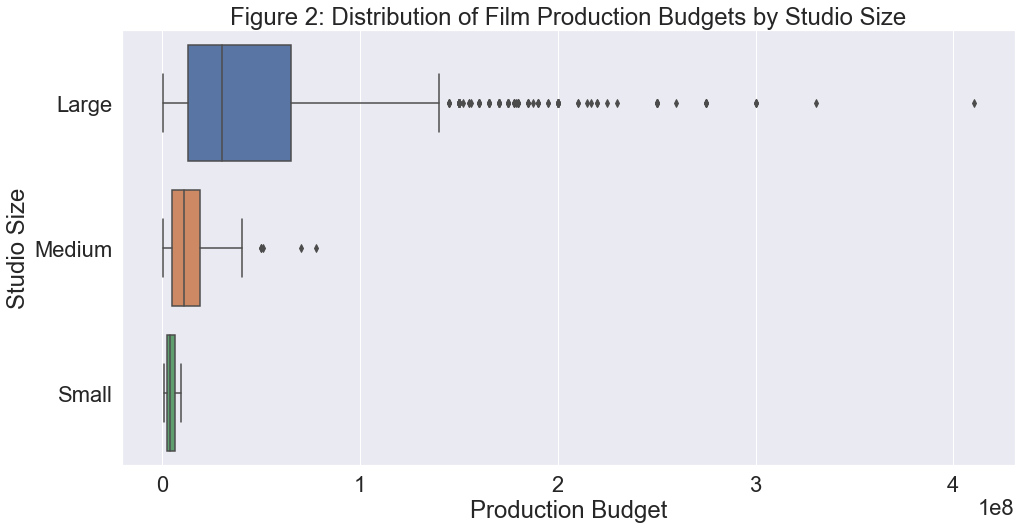

In [21]:
sns.set(font_scale=2)
plt.figure(figsize=(16, 8))
sns.boxplot(y=final_df['studio_size'], x=final_df['production_budget_x'])
plt.xlabel('Production Budget')
plt.ylabel('Studio Size')
plt.title('Figure 2: Distribution of Film Production Budgets by Studio Size');

**Table 4: Production Budgets (USD Millions) and ROI of Top Ten Films**

In [23]:
final_df.pivot_table(values = ['roi', 'production_budget_x'], index = 'title_year').sort_values(by = 'roi', ascending = False)[0:10]

,production_budget_x,roi
title_year,,
The Gallows 2015,100000,415.564740
The Devil Inside 2012,1000000,100.759490
Insidious 2011,1500000,65.580591
Unfriended 2015,1000000,63.364198
Paranormal Activity 2 2010,3000000,58.170677
Split 2017,5000000,54.792961
Get Out 2017,5000000,50.073590
Chernobyl Diaries 2012,1000000,41.411721
Paranormal Activity 3 2011,5000000,40.407969


Table 4 shows the ten films that were most successful according to our ROI metric. The median production budget for the entire dataset is 27 USD million, and budgets range from 500,000 to 410.6 million. We can see the top films have relatively small production budgets, all less than 10 million--smaller than the median and average. 

<a id='conclusions'></a>
## Conclusions and Recommendations ##

Given these insights, we propose that Microsoft do the following:

**1. Keep budgets low.**


As illustrated in our data, studios of all sizes can produce successful films with high ROIs. We recommend that Microsoft start with low-budget films, which are both low risk and high reward. 

**2. You don’t have to be a large studio to produce top performing films--but it can help.** 

Large studios can take more risks, as illustrated by the wide distribution of ROIs of the films they have produced.  Large budget films may help the studio in other aspects not captured by our data--such as branding or marketing--but our analysis found that there are diminishing returns for large studios as film production budgets increase. 

We assume Microsoft has a total production budget in the range of a large studio (100 million USD), and thus can afford to take some risks. 

**3. Metrics matter.**

One could come to very different conclusions if one measured success by revenue, for example. Microsoft should use ROI as a metric because it is a better reflection of value per dollar invested. 

**4. Microsoft should aim to make 10 cheap movies a year, on average.**


We assume Microsoft has the budget in the range of a large studio. Large studios on average make 4 movies a year. If Microsoft focused only on inexpensive movies, they could produce at least 10 movies a year. 

<a id = 'next'></a>
## Next Steps
 - More accurate data on production budgets / studio size

 - Genres
 - Production budget range 
 - Popularity (some kind of metric) / review ratings
 - Independent or major studio
     - Range of ROI
 - How do sequels perform in comparison to originals?
 - Season of release
 - Actors ? 
 - idea - create subset of 0s for second analysis on what not to do. (only if time!)
